### Задание
**Цель:** изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

**Этапы работы:**
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.  
    a. Сделайте выводы.  
    b. Удалите признаки на основании полученных значений, выводов.  
    c. Повторите п. 3, п. 4 на измененных данных.  
7. Исследуйте оставленные признаки на выбросы.  
    a. Удалите выбросы в случае обнаружения.  
    b. Повторите п. 3, п. 4 на измененных данных.  
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.  
    a. Повторите п. 3, п. 4 на измененных данных.  
9. Сформулируйте выводы по проделанной работе.  
    a. Кратко опишите какие преобразования были сделаны с данными.  
    b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.  
    c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.  


Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

**Результат:**
Получены знания по проведению разведочного анализа данных.

**Форма выполнения:**
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb

**Инструменты:**
- Библиотека sklearn.datasets
- Jupyter Notebook/Google Colab
- GitHub

**Рекомендации к выполнению:**
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [14]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

data = california_housing.frame

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

**2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения**

In [16]:
# Через .info() видим, что пропусков нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
# На всякий случай проверим еще на наличие значений, которые могут обозначать пропуски

data.isin([0, 'none', 'nan', 'Nan', 'NaN']).any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [19]:
# Воспользуемся пайплайном из ноутбука из лекции и внесем в него еще метрику RMSE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



def get_score(X,y, random_seed=42, model=None):
    if model is None:
          model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_pred, squared = False ) # squared = False чтобы получить RMSE
    return r2, rmse



In [20]:
X = data.drop(columns=['MedHouseVal'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
y = data['MedHouseVal']

y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

**4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [22]:
r2, rmse = get_score(X, y)

print('R2 = {}, RMSE = {}'.format(r2, rmse))

R2 = 0.5957702326061664, RMSE = 0.7284008391515452


**5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

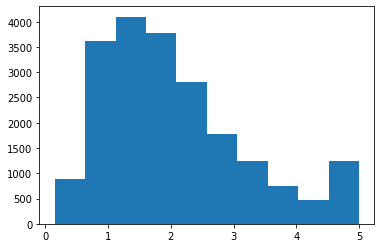

In [23]:
# По графику можно сделать заключение, что выбросы отсутствуют в целевой переменной

plt.hist(y)

plt.show()

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.  
    a. Сделайте выводы.  
    b. Удалите признаки на основании полученных значений, выводов.  
    c. Повторите п. 3, п. 4 на измененных данных.  

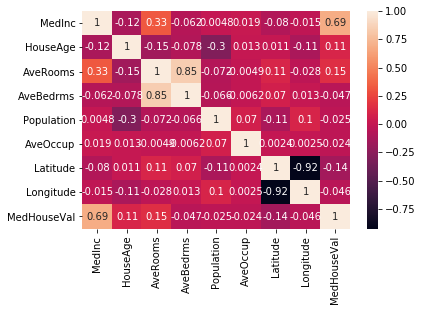

In [24]:
import pandas as pd
import seaborn as sns

sns.heatmap(data.corr(), annot = True)

Из корреляционной матрицы можно увидеть, что атрибуты "Population" и "AveOccup" имеют самую низкую корреляцию с целевой переменной "MedHouseVal" (-0.025 и 0.024), то есть они меньше всего влияют на цену. Попробуем удалить эти атрибуты и посмотрим как это повлияет на качество модели.

In [25]:
X = data.drop(columns=['MedHouseVal', 'Population', 'AveOccup'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,37.85,-122.25


In [26]:
y = data['MedHouseVal']

y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [27]:
r2_2, rmse_2 = get_score(X, y)

print('Первоначальные показания: R2 = {}, RMSE = {}'.format(r2, rmse))
print('После преобразования: R2 = {}, RMSE = {}'.format(r2_2, rmse_2))

Первоначальные показания: R2 = 0.5957702326061664, RMSE = 0.7284008391515452
После преобразования: R2 = 0.594970214672015, RMSE = 0.7291212780479112


Как можем видеть качество модели поменялось незначительно после удаления атрибутов 'Population' и 'AveOccup'. Думаю это потому что они как раз имели самую низкую корреляцию с MedHouseVal и поэтому не влияли на итоговый результат в первой модели

**7. Исследуйте оставленные признаки на выбросы.**  
  a. Удалите выбросы в случае обнаружения.  
  b. Повторите п. 3, п. 4 на измененных данных.

**Выбросы в AveRooms**

Наблюдается большое количетство выбросов в AveRooms и AveBedrms, которые сильно коррелируют между собой

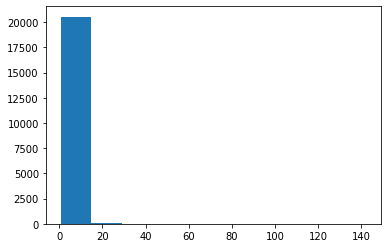

In [45]:
plt.hist(data['AveRooms'])

plt.show()

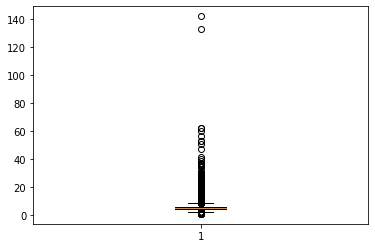

In [35]:
plt.boxplot(data['AveRooms'])

plt.show()

In [44]:
data[data['AveRooms'] > 10].count()

MedInc         109
HouseAge       109
AveRooms       109
AveBedrms      109
Population     109
AveOccup       109
Latitude       109
Longitude      109
MedHouseVal    109
dtype: int64

In [59]:
# Удалим из датасета значения AveRooms свыше 10

data = data[data['AveRooms'] < 10]

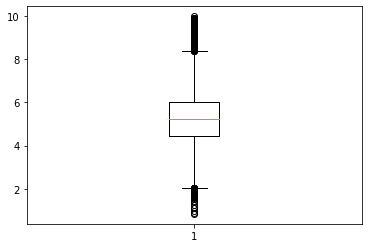

In [60]:
# Видим, что все еще остался длинный хвост из выбросов, но он стал намного короче и поэтому, думаю, качество модели улучшится
plt.boxplot(data['AveRooms'])

plt.show()

**Выбросы в AveBedrms**

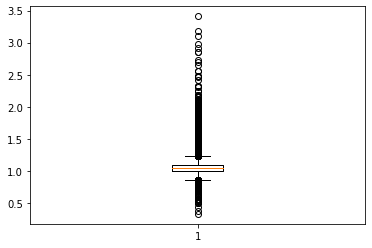

In [61]:
# После удаления выбросов в AveRooms их также стало меньше в AveBedrms


plt.boxplot(data['AveBedrms'])

plt.show()

In [64]:
# Обучим модель после удаления выбросов

X = data.drop(columns=['MedHouseVal', 'Population', 'AveOccup'])

y = data['MedHouseVal']


In [65]:
r2_3, rmse_3 = get_score(X, y)

print('Первоначальные показания: R2 = {}, RMSE = {}'.format(r2, rmse))
print('После преобразования: R2 = {}, RMSE = {}'.format(r2_2, rmse_2))
print('После удаления выбросов: R2 = {}, RMSE = {}'.format(r2_3, rmse_3))

Первоначальные показания: R2 = 0.5957702326061664, RMSE = 0.7284008391515452
После преобразования: R2 = 0.594970214672015, RMSE = 0.7291212780479112
После удаления выбросов: R2 = 0.6096153430925777, RMSE = 0.7305298584244805


Видим, что метрика R2 выросла, а ошибка RMSE наоборот падает, что говорит об улучшении качества модели

**8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.**.  
    a. Повторите п. 3, п. 4 на измененных данных.

Попробуем вычислить логарифм для атрибута MedInc

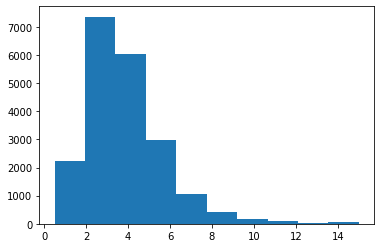

In [70]:
plt.hist(data['MedInc'])

plt.show()

In [71]:
data['MedInc_log'] = np.log(data['MedInc'])

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_log
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.119287
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.116424
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.982022
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.730434
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.347086


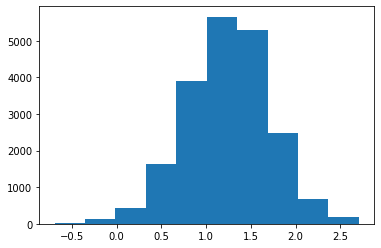

In [72]:
plt.hist(data['MedInc_log'])

plt.show()

In [75]:
# Обучим модель

X = data.drop(columns=['MedHouseVal', 'Population', 'AveOccup'])

y = data['MedHouseVal']


In [76]:
r2_4, rmse_4 = get_score(X, y)

print('Первоначальные показания: R2 = {}, RMSE = {}'.format(r2, rmse))
print('После преобразования: R2 = {}, RMSE = {}'.format(r2_2, rmse_2))
print('После удаления выбросов: R2 = {}, RMSE = {}'.format(r2_3, rmse_3))
print('После мат. преобразования: R2 = {}, RMSE = {}'.format(r2_4, rmse_4))

Первоначальные показания: R2 = 0.5957702326061664, RMSE = 0.7284008391515452
После преобразования: R2 = 0.594970214672015, RMSE = 0.7291212780479112
После удаления выбросов: R2 = 0.6096153430925777, RMSE = 0.7305298584244805
После мат. преобразования: R2 = 0.6102801430950108, RMSE = 0.7299075706633568


**9. Сформулируйте выводы по проделанной работе.**   


**a. Кратко опишите какие преобразования были сделаны с данными.** 

В данной работы были сделаны следующие шаги:
- были удалены признаки с самыми низкими коэффицентами корреляции (Population и AveOccup) с целевой переменной MedHouseVal
- была удалена часть выбросов для AveRooms и AveBedrms
- был вычислен логарифм для MedInc и выведен в новый атрибут MedInc_log

**b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.**


In [78]:
print('Первоначальные показания: R2 = {}, RMSE = {}'.format(r2, rmse))
print('После удаления признаков с низкой корреляцией: R2 = {}, RMSE = {}'.format(r2_2, rmse_2))
print('После удаления выбросов: R2 = {}, RMSE = {}'.format(r2_3, rmse_3))
print('После мат. преобразования: R2 = {}, RMSE = {}'.format(r2_4, rmse_4))

Первоначальные показания: R2 = 0.5957702326061664, RMSE = 0.7284008391515452
После удаления признаков с низкой корреляцией: R2 = 0.594970214672015, RMSE = 0.7291212780479112
После удаления выбросов: R2 = 0.6096153430925777, RMSE = 0.7305298584244805
После мат. преобразования: R2 = 0.6102801430950108, RMSE = 0.7299075706633568


**c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**  

Итоговая метрика R2 = 0.61, что говорит о том, что модель еще пока сырая и нужно работать над ней дальше. 

Однако итоговый R2 выше первоначального значения. Это значит, что произведенные преоброазования улучшают качество модели с каждым новым шагом.